## M345SC 2019 Lab 6

### Task 1: Simulating random walks

The simplest representation of 1-D random walks can be expressed as: $$X_{i+1} = X_i + R_i$$
where $R_i$ is a random number which is either +1 or -1 with equal probability (i.e. it represents a coin flip). This can be implemented in Python in a straightforward manner in Python iterating forward in time and using np.random.choice to carry out the coin flip each step:

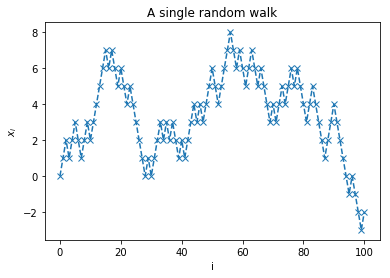

In [36]:
import numpy as np
import matplotlib.pyplot as plt


Nt = 100 #number of iterations
x = np.zeros(Nt+1)

#1 Nt-step random walk
for i in range(Nt):
    x[i+1] = x[i] + np.random.choice((-1,1))

#Display walk
plt.figure()
plt.plot(x,'x--')
plt.xlabel('i')
plt.ylabel('$x_i$')
plt.title("A single random walk")
plt.show()


Ultimately, a single random walk has little meaning, and we need to compute averages over several walks: 

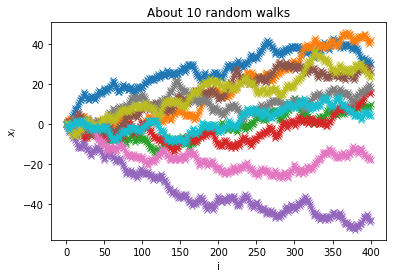

dt=0.690996


In [49]:
from time import time
import numpy as np
def rwalk(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))

    t1 = time()
    #M Nt-step random walks
    for j in range(M):
        for i in range(Nt):
            x[i+1,j] = x[i,j] + np.random.choice((-1,1))

    t2 = time()
    dt = t2-t1    
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
        
    return x,dt
out = rwalk(display=True)
print("dt=%f" %out[1])

The function above is extremely inefficient for large M and Nt.
When working with arrays, it is essential to avoid loops and use built-in functions/methods whenever possible. Modify *rwalk* below so that it: 1) Pre-computes all needed random numbers and stores them in an array before computing the random walks and 2) the loop over M walks is removed and all M walks are simultaneously updated with each step of i:

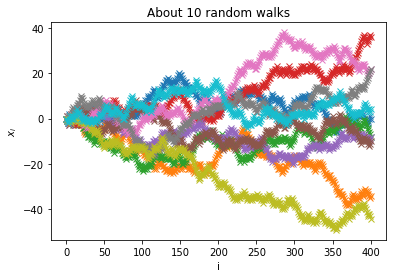

dt=0.004020


In [51]:
from time import time
def rwalk2(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))

    t1 = time()
    
    #**Modify code below and add code here**
    randchoices = np.random.choice((-1,1),(Nt,M))
    #M Nt-step random walks
    for i in range(Nt):
        x[i+1,:] = x[i,:] + randchoices[i,:]

    t2 = time()
    dt = t2-t1    
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
        
    return x,dt
out = rwalk2(display=True)
print("dt=%f" %out[1])

How much faster is your new function?

Now, compute the mean and standard deviation of $x_i$ across the M-samples. You should be able to compute this without using any loops, and you should find that the standard deviation increases as $\sqrt{i}$

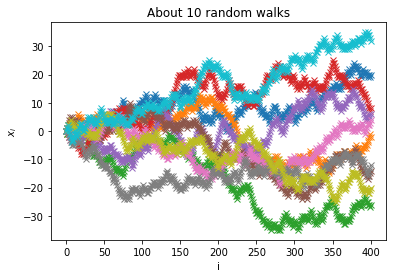

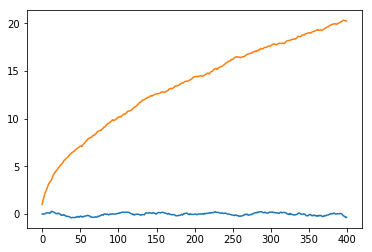

dt=0.004956


In [60]:
from time import time
def rwalk2(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))

    t1 = time()
    
    #**Modify code below and add code here**
    randchoices = np.random.choice((-1,1),(Nt,M))
    #M Nt-step random walks
    for i in range(Nt):
        x[i+1,:] = x[i,:] + randchoices[i,:]

    t2 = time()
    dt = t2-t1    
    
    mean = np.mean(x[1:,:], axis=1)
    std = np.std(x[1:,:], axis=1)
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
    
    if display:
        plt.figure()
        plt.plot(range(Nt), mean,
                 range(Nt), std)
        plt.show()
        
    return x,dt
out = rwalk2(display=True)
print("dt=%f" %out[1])

    

### Task 2: Practice with arrays, eigenvalues and eigenvectors

1) Use the *np.random.rand* function to generate a 3 x 3 matrix, N 

In [92]:
import numpy as np
A = np.random.rand(3,3)

2) Compute the eigenvalues and eigenvectors of N:

In [93]:
eigs = np.linalg.eig(A)

3) Verify that $\textrm{det}(N-\lambda_1 I)=0$ where $\lambda_1$ is the first eigenvalue of N:

In [94]:
np.linalg.det(A - eigs[0][0]*np.identity(3))


(2.6566414079292734e-16+0j)

4) Verify that $N v_1 = \lambda_1 v_1$ where $v_1$ is the first eigenvector of N:

In [104]:
print(np.matmul(A, eigs[1][0]))
print(eigs[0][0] * eigs[1][0])

[0.25408041-0.19235915j 0.18030845-0.25651877j 0.54414668-0.13636949j]
[ 1.04278658+0.j         -0.23078663+0.54443835j -0.23078663-0.54443835j]
